#     RESULTS OF THE  TEMPERATURE-SET OF SIMULATIONS

In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from data_analysis  import *

In [3]:
final_state, t, J, h, T, e, m= load_set_results("test_16b")
T_final = T[:, -1]
e_final = e[:, -1]

<IPython.core.display.Javascript object>


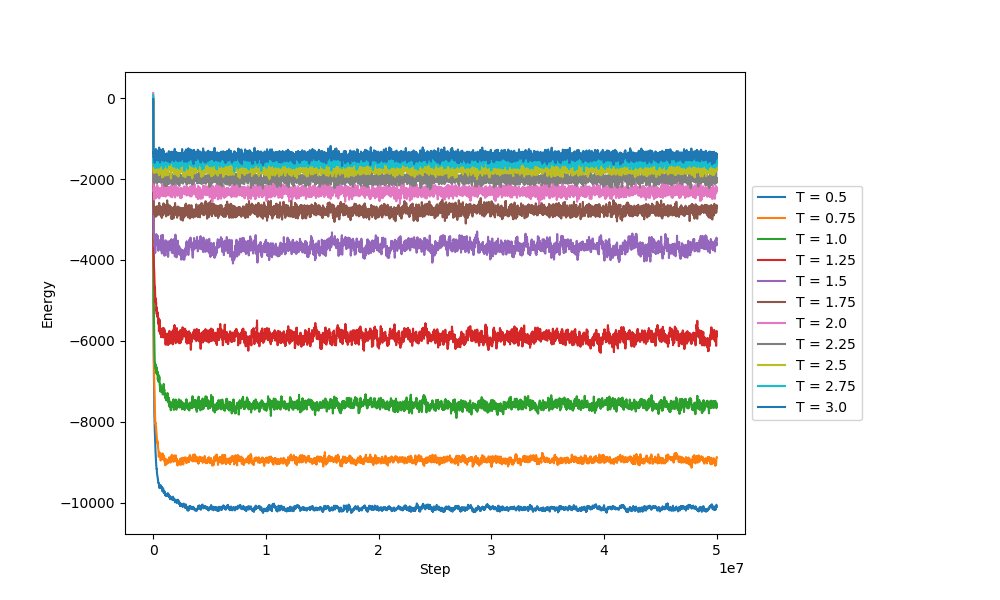

In [4]:
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)
for i in range(0, t.shape[0]):
    ax.plot(t[i], e[i], label=f"T = {T_final[i]}")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Step")
plt.ylabel("Energy")
plt.show()

In [5]:
m_final = m[:,-1]
m_magnitude = np.sqrt(np.sum(m**2, axis = 2))
m_magnitude_final = np.sqrt(np.sum((m_final)**2, axis = 1))

<IPython.core.display.Javascript object>


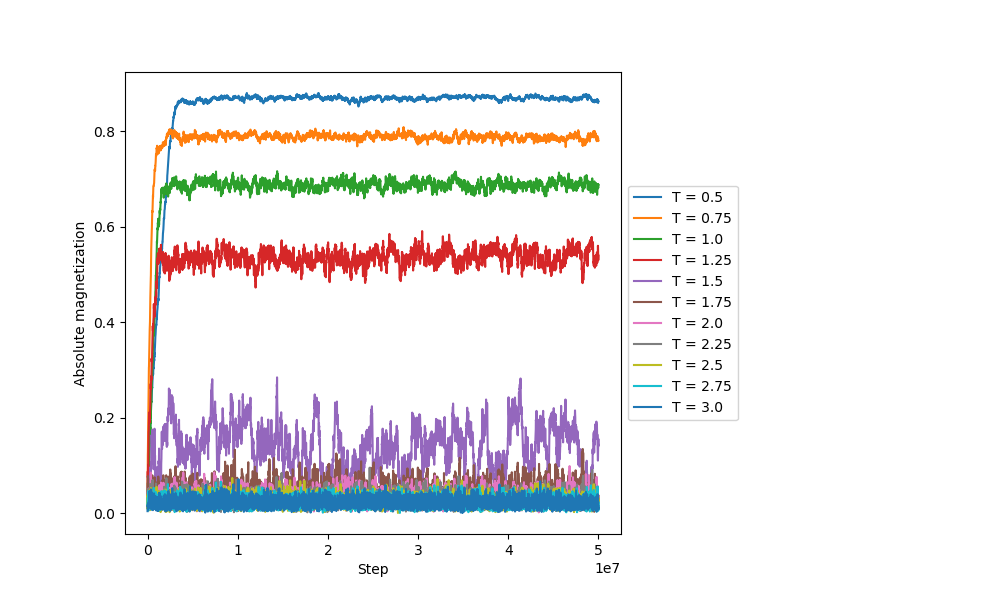

In [6]:
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)
for i in range(0, t.shape[0]):
    ax.plot(t[i], m_magnitude[i], label=f"T = {T_final[i]}")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Step")
plt.ylabel("Absolute magnetization")
plt.show()

In [7]:
# SELECT WARMUP PERIOD TO LAST UNTIL 1e7 steps
warmup_final_idx = np.argmax(t==1e7)
t = t[:,warmup_final_idx:]
e = e[:, warmup_final_idx:]
m = m[:, warmup_final_idx:]

<IPython.core.display.Javascript object>


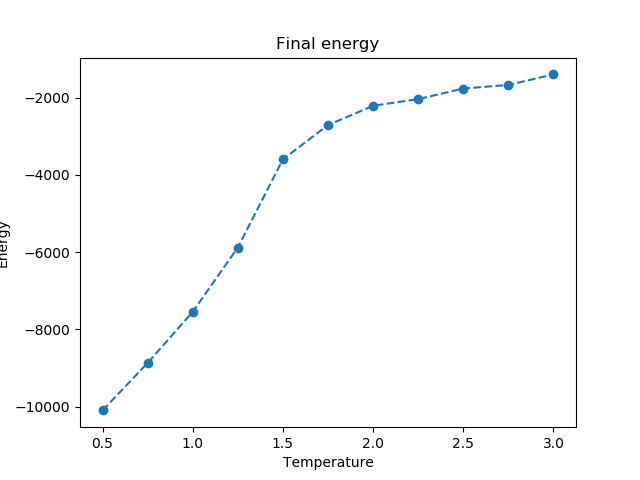

In [74]:
plt.figure()
plt.plot(T_final, e_final, 'o--')
plt.xlabel("Temperature")
plt.ylabel("Energy")
plt.title("Final energy")
plt.show()

<IPython.core.display.Javascript object>


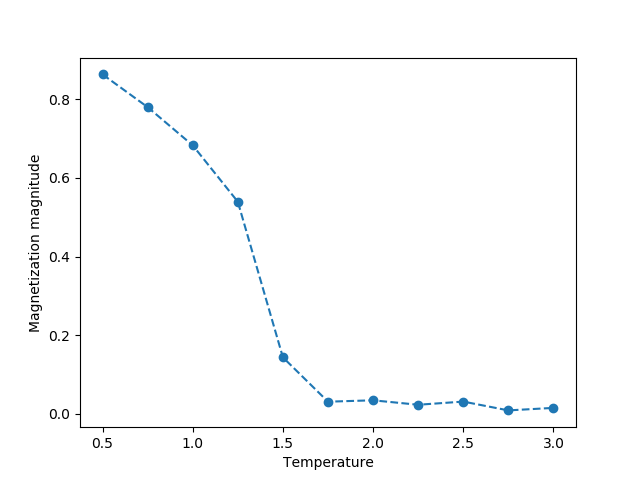

In [72]:
plt.figure()
plt.plot(T_final, m_magnitude_final, 'o--')
plt.xlabel("Temperature")
plt.ylabel("Magnetization magnitude")
plt.show()

In [10]:
e_mean, e_rmsd, m_mean, m_rmsd = compute_set_statistics(e,m)
    

In [11]:
cv = e_rmsd**2/T_final**2

<IPython.core.display.Javascript object>


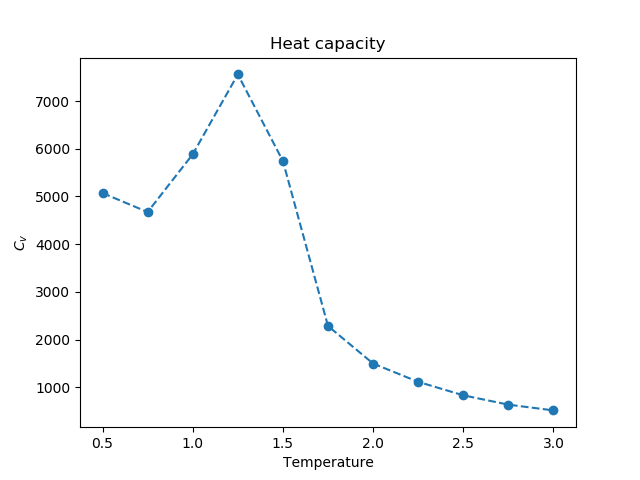

In [71]:
plt.figure()
plt.title("Heat capacity")
plt.plot(T_final, cv, 'o--')
plt.xlabel("Temperature") 
plt.ylabel(r"$C_v$")
plt.show()

In [34]:
chi_xx = m_rmsd[:,0]**2/T_final
chi_yy = m_rmsd[:,1]**2/T_final
chi_zz = m_rmsd[:,2]**2/T_final

<IPython.core.display.Javascript object>


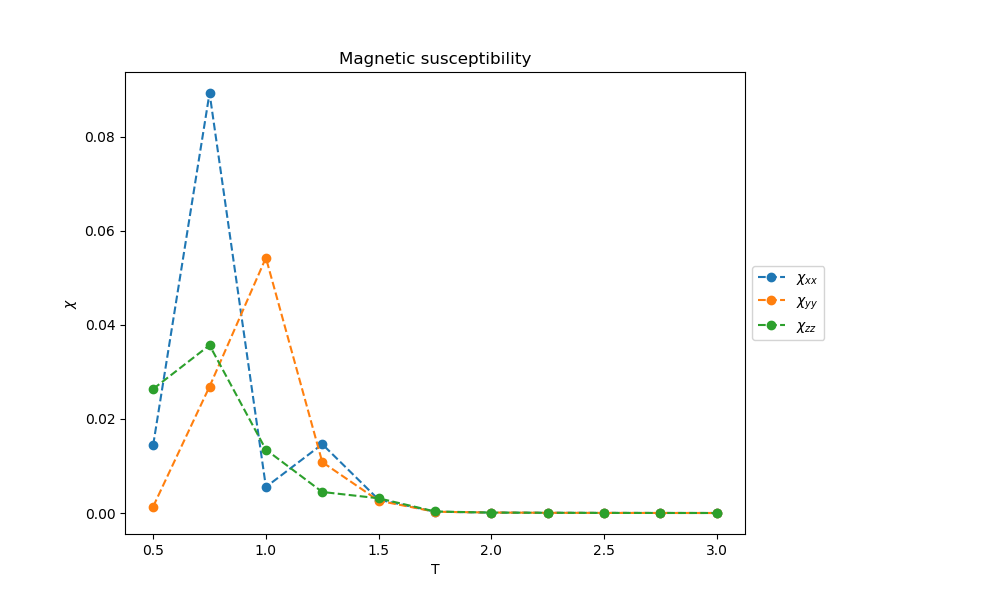

In [69]:
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)
ax.plot(T_final, chi_xx, 'o--', label=r"$\chi_{xx}$")
ax.plot(T_final, chi_yy, 'o--', label=r"$\chi_{yy}$")
ax.plot(T_final, chi_zz, 'o--', label=r"$\chi_{zz}$")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel(r"$\chi$")
plt.xlabel(r"T")
plt.title("Magnetic susceptibility")
plt.show()